<a href="https://colab.research.google.com/github/Akhilesh015/Bobble_Test_exercise/blob/master/Bobble_Akhilesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part C question 5



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
val=pd.read_csv("validation.csv")
train=pd.read_csv("train.csv")

In [3]:
train.head()

,dbfs,rms,avg,mode,std,dcoffset,filename,target
0,-23.342901,0.068081,9.726773e-06,0.000000,0.068081,0.000000,BPCRGRYCXPI,silent
1,-32.613091,0.023555,-1.376716e-05,-0.033556,0.023555,-0.000061,UE4OHIQ6JJO,noise
2,-33.918120,0.020217,-2.388173e-05,-0.020961,0.020217,-0.000061,N0B0Z81N2KQ,noise
3,-28.287812,0.038521,-2.014348e-06,0.000122,0.038521,-0.000031,IL6D7IEAKXH,silent
4,-24.189081,0.061746,-6.716756e-07,-0.000122,0.061746,-0.000031,6VKOI64H5QS,silent


In [4]:
train.describe()

,dbfs,rms,avg,mode,std,dcoffset
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-24.365061,0.076494,-0.000208,-0.078601,0.076394,-0.001530
std,8.112060,0.063158,0.005856,0.160891,0.063007,0.014291
min,-67.845098,0.000406,-0.012704,-1.218606,0.000406,-0.257812
25%,-27.517713,0.041780,-0.000136,-0.093902,0.041780,-0.000178
50%,-24.031654,0.061847,-0.000014,-0.001987,0.061847,-0.000031
75%,-21.093569,0.086572,0.000004,0.000000,0.086543,0.000000
max,38.687602,0.463202,0.080826,0.999939,0.463201,0.024780


DATA PREPROCESSING

In [5]:
train.drop('filename',axis=1,inplace=True) #filename is not important for the final target variable so we drop the whole column.
val.drop('filename',axis=1,inplace=True)

In [6]:
train.isnull().sum() #not a single null value

dbfs        0
rms         0
avg         0
mode        0
std         0
dcoffset    0
target      0
dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler

sc_train = StandardScaler()

In [8]:
columns_to_scale = ['dbfs', 'rms', 'avg', 'mode', 'std','dcoffset']
train[columns_to_scale] = sc_train.fit_transform(train[columns_to_scale])
val[columns_to_scale] = sc_train.fit_transform(val[columns_to_scale])


In [9]:
train

,dbfs,rms,avg,mode,std,dcoffset,target
0,0.126036,-0.133237,0.037227,0.488656,-0.131973,0.107063,silent
1,-1.017016,-0.838398,0.033214,0.280042,-0.838826,0.102791,noise
2,-1.177931,-0.891267,0.031486,0.358344,-0.891822,0.102791,noise
3,-0.483691,-0.601385,0.035221,0.489415,-0.601244,0.104927,silent
4,0.021699,-0.233569,0.035451,0.487897,-0.232545,0.104927,silent
...,...,...,...,...,...,...,...
1995,-0.752365,-0.736510,0.033628,0.490554,-0.736693,0.104927,silent
1996,-1.096543,-0.866342,0.031801,0.098315,-0.866837,0.105530,noise
1997,-0.115356,-0.351089,-0.534629,0.468166,-0.351977,-0.127888,silent
1998,1.277550,1.966369,0.034417,-2.168767,1.972671,0.104927,noise


In [10]:
train.corr()

,dbfs,rms,avg,mode,std,dcoffset
dbfs,1.000000,0.751579,0.448142,-0.507775,0.745904,-0.518250
rms,0.751579,1.000000,0.145995,-0.811643,0.999897,-0.176478
avg,0.448142,0.145995,1.000000,-0.102367,0.133597,-0.829438
mode,-0.507775,-0.811643,-0.102367,1.000000,-0.812288,0.090193
std,0.745904,0.999897,0.133597,-0.812288,1.000000,-0.162709
dcoffset,-0.518250,-0.176478,-0.829438,0.090193,-0.162709,1.000000


We can see that rms and dbfs are highly dependent on each other.



In [11]:
target_count=train.target.value_counts()
target_count      # dataset is perfectly balanced.

silent    1000
noise     1000
Name: target, dtype: int64

In [12]:
def f(s):
    if s == "silent":
        return 0
    else:
        return 1   #converting noise and silent to 0s and 1.

In [13]:
train['target']=train.target.apply(f)

val['target']=val.target.apply(f)



In [14]:
train  # converted target column to 0 and 1.
## silent =0 noise =1

,dbfs,rms,avg,mode,std,dcoffset,target
0,0.126036,-0.133237,0.037227,0.488656,-0.131973,0.107063,0
1,-1.017016,-0.838398,0.033214,0.280042,-0.838826,0.102791,1
2,-1.177931,-0.891267,0.031486,0.358344,-0.891822,0.102791,1
3,-0.483691,-0.601385,0.035221,0.489415,-0.601244,0.104927,0
4,0.021699,-0.233569,0.035451,0.487897,-0.232545,0.104927,0
...,...,...,...,...,...,...,...
1995,-0.752365,-0.736510,0.033628,0.490554,-0.736693,0.104927,0
1996,-1.096543,-0.866342,0.031801,0.098315,-0.866837,0.105530,1
1997,-0.115356,-0.351089,-0.534629,0.468166,-0.351977,-0.127888,0
1998,1.277550,1.966369,0.034417,-2.168767,1.972671,0.104927,1


Exploratory Data Analysis

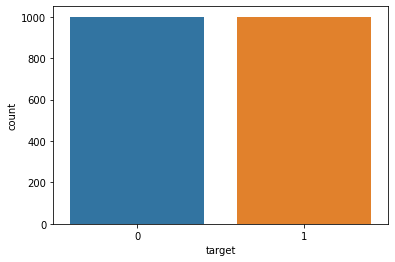

In [15]:
y=train['target']  #our dependent variable
plot=sns.countplot(train['target'])
# plotting the number of target values.

Taking train and validation data

In [16]:
X_train=train.iloc[:,:-1]
Y_train=train['target']

X_test=val.iloc[:,:-1]
Y_test=val['target']



In [17]:
X_train.shape,Y_train.shape


((2000, 6), (2000,))

In [18]:
X_test.shape,Y_test.shape

((500, 6), (500,))

Fitting the models

In [19]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
y_pred_lr=logreg.predict(X_test)


In [21]:
from sklearn.metrics import accuracy_score

In [22]:
score_lr=round(accuracy_score(y_pred_lr,Y_test)*100,2)
print("Accuracy achieved from Logistic Regression Model is: "+str(score_lr)+'%')

Accuracy achieved from Logistic Regression Model is: 93.6%


In [23]:
cvb=logreg.score(X_train,Y_train)*100
bvc=logreg.score(X_test,Y_test)*100
print("Train accuracy is: ",cvb)
print("Test accuracy is: ",bvc)  

Train accuracy is:  94.95
Test accuracy is:  93.60000000000001


In [24]:
##both accuracy are almost similar.

In [25]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test,y_pred_lr)
#plotting confusion matrix

(2.5, -0.5)

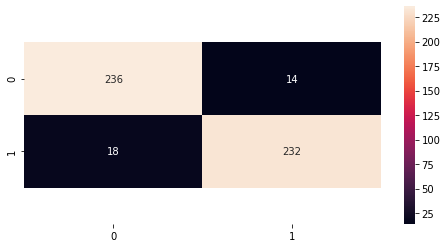

In [26]:
plt.figure(figsize=(8,4))
ax=sns.heatmap(matrix,annot = True, fmt = "d")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


In [27]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


In [28]:
pres=precision_score(Y_test,y_pred_lr)
print("Precison: ",pres)
recall=recall_score(Y_test,y_pred_lr)
print("Recall: ",recall)

Precison:  0.943089430894309
Recall:  0.928


In [29]:
f1=((2*pres*recall)/(pres+recall))
print('F1 score: ',f1)  ## F1 score is helpful when false negative and false positive are important.

F1 score:  0.9354838709677419


2nd Model -KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)

y_pred_knn = knn.predict(X_test)


In [32]:
score_knn = round(accuracy_score(y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 94.0 %


In [33]:
k1=knn.score(X_train,Y_train)
k2=knn.score(X_test,Y_test)
print('Training Accuracy: ',k1*100,'%')
print('Testing Accuracy: ',k2*100,'%')

Training Accuracy:  96.95 %
Testing Accuracy:  94.0 %


Above accuracy shows a little overfitted data..so now I will plot all the accuracies with no. of neighbors and then modify the model.

In [34]:
knn_scores=[]
for k in range(1,21):
    knn= KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, Y_train)
    knn_scores.append(knn.score(X_test, Y_test))
    knn_updated = [round(num, 2) for num in knn_scores]

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

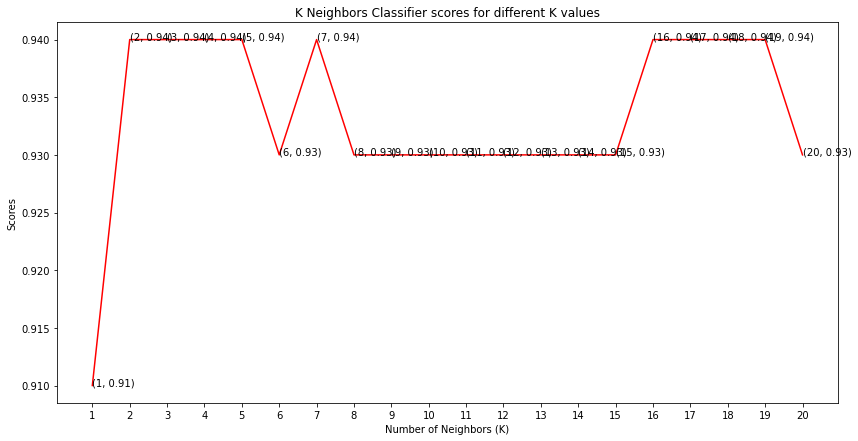

In [35]:
plt.figure(figsize=(14,7))
plt.plot([k for k in range(1, 21)], knn_updated, color = 'red')
for i in range(1,21):
    plt.text(i, knn_updated[i-1], (i, knn_updated[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

Some Neighbors with highest accuracies =5,7,16.

In [51]:
knn_new= KNeighborsClassifier(algorithm='brute',n_neighbors=16)
knn_new.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

In [53]:
y_pred_knn_new = knn_new.predict(X_test)

score_knn_new = round(accuracy_score(y_pred_knn_new,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn_new)+" %")

The accuracy score achieved using KNN is: 93.6 %


In [54]:
knn1_new=knn_new.score(X_train,Y_train)
knn2_new=knn_new.score(X_test,Y_test)
print('Training accuracy:') 
print(round(knn1_new*100,2),'%')
print("Testing accuracy:")
print(round(knn2_new*100,2),'%')

Training accuracy:
95.4 %
Testing accuracy:
93.6 %


Even the overall testing accuracy decreased from 94% to 93.6% but the overfitting also decreased slightly therefore we can take this model for consideration now.

Confusion Matrix


In [56]:
matrix_knn_new= confusion_matrix(Y_test, y_pred_knn_new)

(2.5, -0.5)

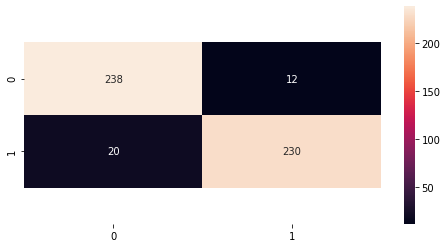

In [58]:
plt.figure(figsize=(8,4))
ax=sns.heatmap(matrix_knn_new,annot = True, fmt = "d")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [61]:
rec_knn=recall_score(Y_test,y_pred_knn_new)

precision_knn = precision_score(Y_test, y_pred_knn_new)

f1_knn=((2*precision_knn*rec_knn)/(precision_knn+rec_knn))
print('F1 score: ',f1_knn*100)

print("Precision: ",precision_knn*100)

print("Recall: ",rec_knn)

F1 score:  93.4959349593496
Precision:  95.0413223140496
Recall:  0.92


Comparison of Both Models

In [65]:
accuracy=[]
classifiers = [ 'Logistic Regression','KNN']
models = [KNeighborsClassifier(n_neighbors=16,algorithm='brute'), LogisticRegression()]

for i in models:
    model = i
    model.fit(X_train, Y_train)
    score = model.score(X_test, Y_test)
    accuracy.append(score)


In [66]:
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)
summary

,accuracy
Logistic Regression,0.936
KNN,0.936


Accuracy of both models are similar after taking into account the scenario of overfitting..so now we can print their precision and F1 scores for better judgement.

In [69]:
print("Precision for Logistic Regression Model is:",pres*100)
print("Precision for KNN Model is:",precision_knn*100)


Precision for Logistic Regression Model is: 94.3089430894309
Precision for KNN Model is: 95.0413223140496


In [71]:
print("F1 score for Logistic Regression Model is:",f1*100)
print("F1 score for Logistic Regression Model is:",f1_knn*100)

F1 score for Logistic Regression Model is: 93.54838709677419
F1 score for Logistic Regression Model is: 93.4959349593496


Based on above observations we can conlude that F1 scores are non-judgemental and precision plays its part in deciding the model.

Precision for KNN is better the Logistic Regression.Hence we can opt for KNN model for this problem for further usage.
